# Sales Prediction Using Python

### Problem Statement

<p>Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.</p>
<p>Typically, a product and service-based business always need a Data Scientist to predict future sales with every step they take to manipulate the cost of advertising thier product. So, this project will use the amount spent to advertise products on different media platforms such as TV, Radio and Newspaper, to predict the sales of the products.The dataset has 200 entries with 5 columns. The source data was obtained from <a href='https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fbumba5341%2Fadvertisingcsv&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document'>Kaggle</a></p>

The libraries used for this sales prediction with machine learning using Python programming language include;
<ul>
    <li>numpy - for numerical operations</li>
    <li>pandas - for data analysis</li>
    <li>matplotlib/seaborn - for plotting and data visualization</li>
    <li>scikitlearn - for machine learning modeling and evaluation</li>
 </ul>

### Loading Data

In [1]:
# import all the tools that will be needed

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
# To visualize the plottings inside the notebook
%matplotlib inline 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Model Evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Load the data
sales_df = pd.read_csv('advertising.csv', index_col=False)
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Rows and columns
sales_df.shape

(200, 5)

### Exploratory Data Analysis (EDA)

In [4]:
sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
sales_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
sales_df["TV"].sum(), sales_df["Radio"].sum(), sales_df["Newspaper"].sum()

(29408.5, 4652.800000000001, 6110.799999999999)

In [8]:
X = sales_df.drop('Sales', axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


<AxesSubplot:>

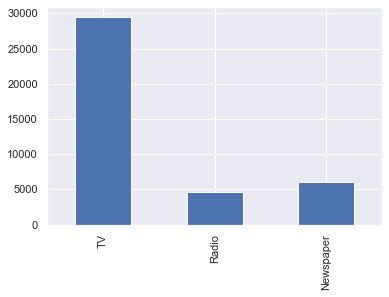

In [9]:
X.sum().plot(kind='bar')

In [10]:
y = sales_df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

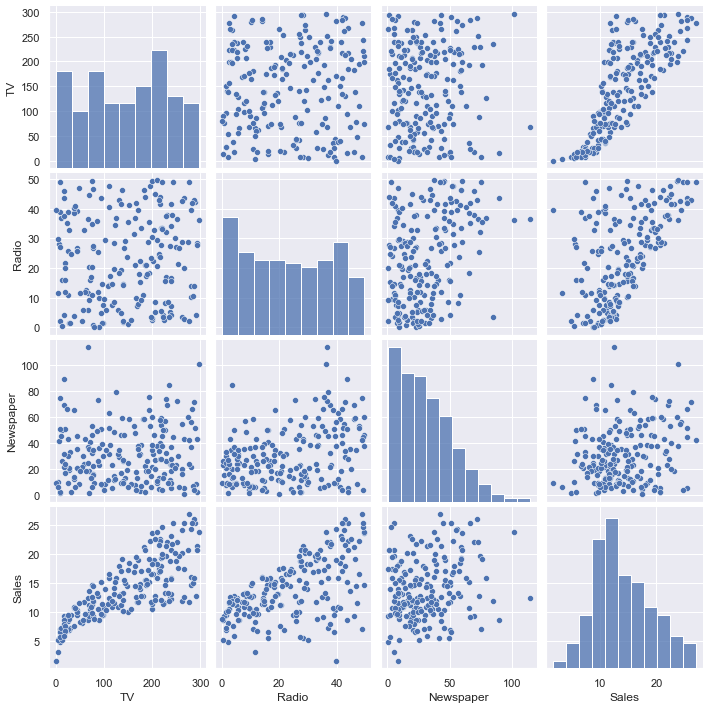

In [11]:
sns.pairplot(sales_df)

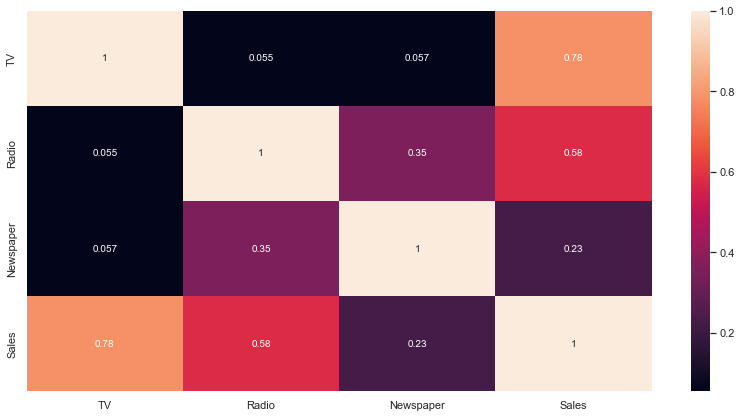

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.heatmap(sales_df.corr(), annot=True)

### Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 3), (160,), (40, 3), (40,))

In [15]:
lg = LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.8994380241009121

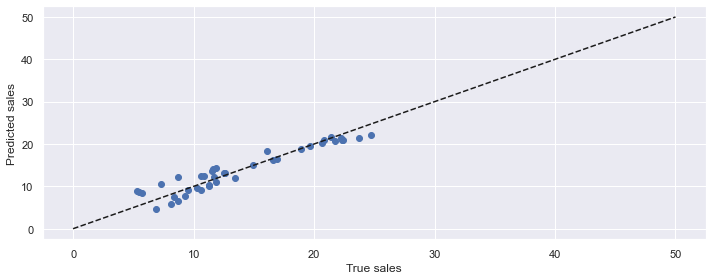

In [16]:
predicted = lg.predict(X_test)
expected = y_test

plt.figure(figsize=(10,4))
plt.scatter(expected, predicted)
plt.plot([0,50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True sales')
plt.ylabel('Predicted sales')
plt.tight_layout()

In [17]:
# putting the models in a dictionary / pipeline

models = {
    "XGBoost Regressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    #"CatBoost": CatBoostRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNeighbor Regressor": KNeighborsRegressor(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
}

# setting up a function to fit and score model

def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    fits and evaluates given machine learning models
    models: a dictionary of different scikitlearn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no label)
    y_train: training labels
    y_test: testing labels
    '''
    
    # setting up a random seed
    np.random.seed(42)
    
    # making a dictionary to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        model.fit(x_train, y_train) # fitting the model to the dataset
        model_scores[name] = model.score(x_test, y_test) # evaluating the model and appending its score  to model_scores
    return model_scores

In [18]:
%%time
scores = fit_and_score(models=models,
                      x_train=X_train,
                      x_test=X_test,
                      y_train=y_train,
                      y_test=y_test)
scores

Wall time: 387 ms


{'XGBoost Regressor': 0.983066947744656,
 'Decision Tree Regressor': 0.9310914968293178,
 'Random Forest': 0.9812043590568644,
 'GradientBoosting': 0.983667609715562,
 'KNeighbor Regressor': 0.9106204438460053,
 'Ridge': 0.89943810463304,
 'SVR': 0.873080187377834,
 'Linear Regression': 0.8994380241009121}

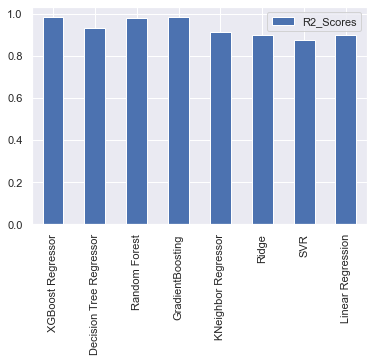

In [19]:
model_compare = pd.DataFrame(scores, index=['R2_Scores'])
model_compare.T.plot.bar(); # T means Transpose, so as to improve the plot

### Using XGBRegressor to train the model

In [20]:
xgb = XGBRegressor()
parameters = {
     'learning_rate': [0.05, 0.10, 0.15],
                'max_depth': [3, 4, 5, 6, 8],
                'min_child_weight': [1, 3, 5, 7],
                'gamma': [0.0, 0.1, 0.2],
                'colsample_bytree': [0.3, 0.4]}

# perform grid search with cross_validation 
#to find the best parameters
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid_search = GridSearchCV(xgb, parameters, cv=cv)
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)

{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 3, 'min_child_weight': 7}


In [21]:
xgb = XGBRegressor(colsample_bytree = 0.3, gamma = 0.1, learning_rate = 0.15, max_depth = 3, min_child_weight = 7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
predict_sales = xgb.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, predict_sales)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predict_sales)
r2 = r2_score(y_test, predict_sales)

print(f'MSE is {mse}')
print(f'RMSE is {rmse}')
print(f'R2 Score is {r2}')
print(f'MAE is {mae}')

MSE is 2.839481372588535
RMSE is 1.6850760732348362
R2 Score is 0.9100393511879954
MAE is 1.2672589182853697


In [24]:
# comparing actual values with predicted values
Prediction = pd.DataFrame(data={"actual sales": y_test,
                          "predicted sales": predict_sales})
Prediction[:10]

,actual sales,predicted sales
95,16.9,18.421152
15,22.4,21.024136
30,21.4,20.593861
158,7.3,9.726223
128,24.7,20.241165
115,12.6,14.955249
69,22.3,20.384794
170,8.4,8.509890
174,11.5,11.793131
45,14.9,14.962306


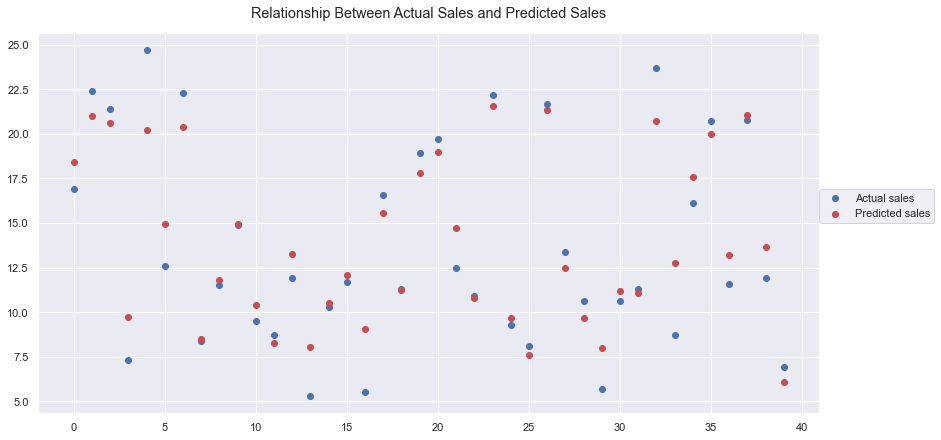

In [25]:
fig, ax = plt.subplots(figsize=(14,7)) 
x = np.arange(0, len(Prediction), 1)
ax.scatter(x, Prediction["actual sales"], c='b', label="Actual sales")
ax.scatter(x, Prediction["predicted sales"], c='r', label="Predicted sales")
ax.text(0.5, 1.05, 'Relationship Between Actual Sales and Predicted Sales', 
        horizontalalignment='center', verticalalignment='center', 
        transform=ax.transAxes, fontsize='x-large')

ax.legend(loc=(1, 0.5)); 

### Feature Importance

In [26]:
# to know which of the features that has the most importance 
# or affecting the model more in making predictions
xgb.feature_importances_ 

array([0.6210665 , 0.27744567, 0.10148785], dtype=float32)

In [27]:
# creating a function for visualizing the feature importances

def plot_importances(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,'feature_importances': importances})
           .sort_values('feature_importances', ascending=False).reset_index(drop=False))
    
    # ploting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x='feature_importances', y='features', data = df[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')
    plt.title('Feature Importance (XGB Regressor)', fontsize=16)

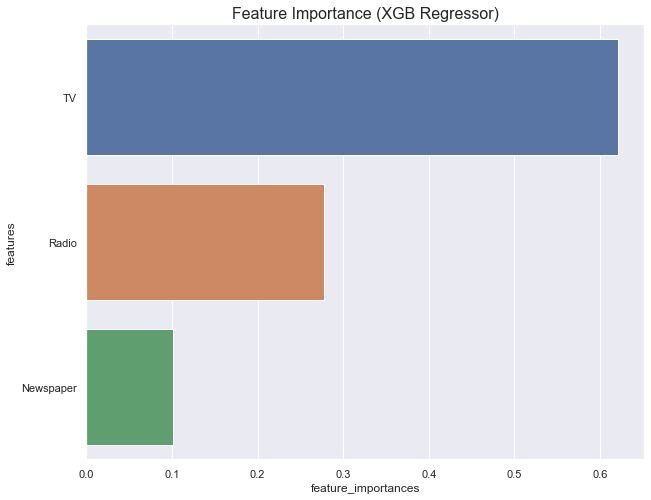

In [28]:
plot_importances(X_train.columns, xgb.feature_importances_)

In [29]:
# export to a pickle file
import pickle
with open('sales_prediction.pickle', 'wb') as f:
    pickle.dump(xgb,f)

In [30]:
# create a json file to store your columns
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("sales_columns.json", "w") as f:
    f.write(json.dumps(columns))

### Thank you